In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import sklearn

#Mashina learning haqida 
##Supervised learnig(Nazorat ostida)
###Klassifikatsiya
<li>diagnostika tasvirlarni ajratish</li>
<li>fribgarlarni aniqlash </li> 
<li>mijozlarni saqlab qolish </li>
<ol>Regrasseiya (o'zgaruvchilar o'rtasidagi bog'liq)</ol>
<li>Bashorat qilish obha aholi-soni va narx navo doller kursi</li>
<li> Baholash uy , mashina , yerni baholash </li>
<h1>Unsupervised learnig(nazoratsiz)</h1>

<a href="https://jovian.ai/anvarnarz/05-ml-01-end2end/v/1?utm_source=embed">

<h1>2-Modul</h1> </a>


In [ ]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape


(20640, 10)

#2-model Malumotlarni o'rganish 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:

df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


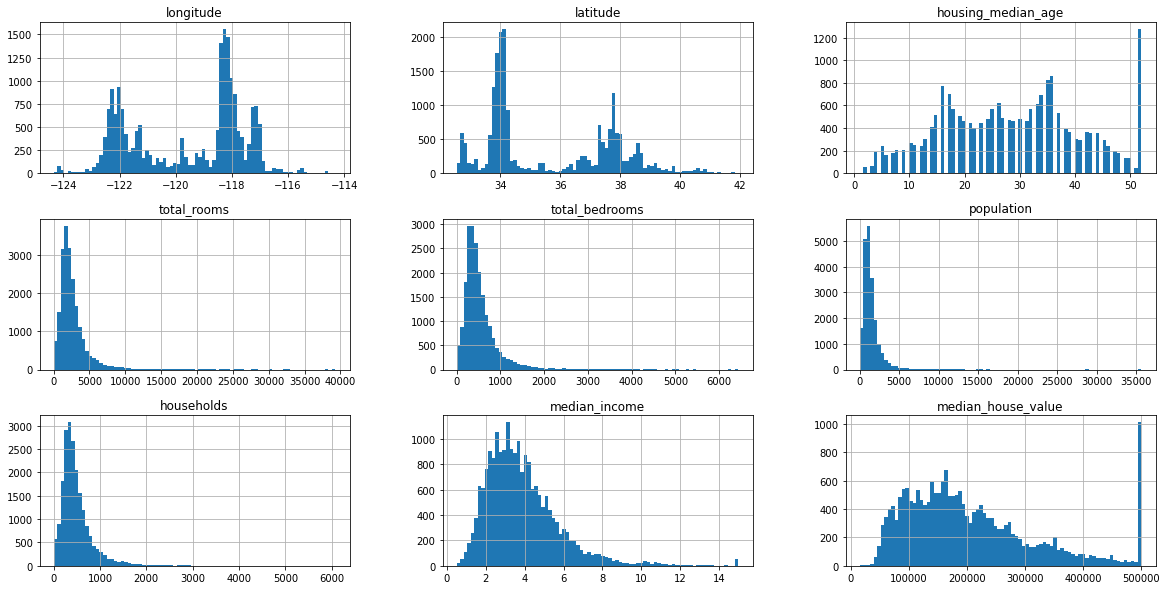

In [ ]:
df.hist(bins=80, figsize=(20,10))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
trein_set, test_set = train_test_split(df, test_size = 0.2, random_state=30)

Tahlilda davom etamiz:
1. `median_income` (median daromad) - ustunidagi sonlar tushunarsiz (1 xonali son nimani anglatadi?). Mijoz bilan gaplashgandan so'ng sonlar ming dollarda ekanini bilamiz (ya'ni 4 bu 4000$ degan)
2. `housing_median_age` (uylarning median yoshi) grafikida 50 yoshli uylar birdan oshib ketgan. Mijozda bilan buni aniqlashtiramiz: ma'lumotlar jamlanganda yoshi 50 dan oshgan barcha uylar 50 deb kiritilgan ekan (orasida 60-70-100 yillik ular ham bo'lishi mumkin). Ya'ni ma'lumotlarga chegara belgilangan. 
3. `median_house_value` (uylarning median narhi) da ham shunday holat, ya'ni narhi 500 000\$ dan qimmat uylar hammasi 500ming deb yozib yuborilgan. **Bu esa biz uchun yaxshi emas**. Sababi, bizning qurgan modelimiz 500mingdan qimmat uylarni to'g'ri baholay olmaydi. Oldimizda 2 yo'l bor:
    - Qimmat uylar uchun ma'lumotlarni qayta yig'ish
    - 500mingdan qimmat uylar bor hududlarni datasetdan chiqarib tashlash.
4. Ma'lumotlar taqsimoti bir tomonga og'gan (qo'ng'iroqsimon emas), ML uchun normal taqsimot bo'lgani afzal (buni qanday to'g'rilashni kelgusida ko'ramiz).
![normal taqsimot](https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png)

In [ ]:
trein_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,95600.0,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,410000.0,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND
12462,-121.43,38.57,38.0,2507.0,446.0,888.0,448.0,4.0972,163700.0,INLAND
19813,-119.26,36.61,33.0,560.0,90.0,310.0,113.0,2.5417,118800.0,INLAND
11229,-117.93,33.80,29.0,1672.0,267.0,891.0,281.0,4.8611,231900.0,<1H OCEAN
16696,-120.62,35.11,18.0,2241.0,544.0,1521.0,509.0,2.0292,155800.0,<1H OCEAN
13564,-117.29,34.15,42.0,1811.0,345.0,856.0,352.0,2.9667,97000.0,INLAND


`train_test_split` yordamida bo'lishning kamchiligi, ma'lumotlardagi balans yo'qolishi mumkin. Misol uchun, bizdagi datasetda `median_income` ustuniga qarasak aholining aksari 2000-4000\$ oralig'da daromad qilar ekan. 8000 dan ko'proq daromad oladiganlar esa anchagina kam. Agar biz train va test setlarda shu taqisomtni saqlab qolmoqchi bo'lsak `StratifiedShuffleSplit` obyektiga murojaat qilamiz.

### 2.2 Trains va Test set.
Esingizda bo'lsa avvalgi modulda ML uchun ma'lumotlarni ikki (aniqro'gi uch) qismga ajratib olishni gaplashgan edik: 
- Train set - model yaratish uchun
- Test set - model aniqligini tekshirish uchun

Aslida, ma'lumotlarni tahlil qilish bosqichida bunga hali ertadek tuyulishi mumkin, lekin bu yerda maqsad nafaqat komyuterni balki bizning ham xato xulosa qilishimizni oldini olish.

Avval tasviya qilganimizdek ma'lumotlarnining 80\% train, 20\% test uchun ajratamiz. Buning uchun `scikit-learn` tarkibida tayyor `train_test_split` funskyasiga murojaat qilamiz.

Funskiyaga parametr sifatida dataset (`df`), test set hajmi (0.2 ya'ni 20%) va tasodifiy sonlar generatori uchun qiymat (`random_seed`) beramiz.

**`random_seed`** ning vazifasi `train_test_split` funksiyani ishga tushirganda doim bir hil tasodifiy qiymatlar olish. Bu esa, ML model yaratish jarayonida `test_set` doim yashirin qolishini ta'minlaydi.

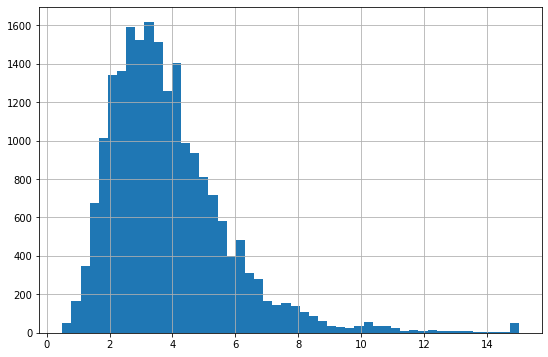

In [ ]:
df['median_income'].hist(bins=50, figsize=(9,6))
plt.show()


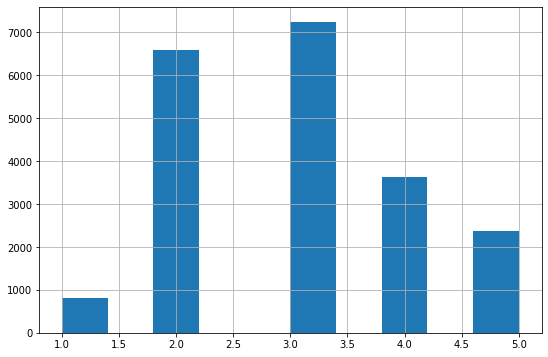

In [ ]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [ ]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
1186,-121.55,39.45,18.0,2278.0,523.0,1185.0,475.0,1.3611,60600.0,INLAND,1
18956,-122.04,38.25,38.0,1214.0,244.0,632.0,254.0,2.8438,94200.0,INLAND,2
12619,-121.54,38.51,17.0,8482.0,1590.0,3362.0,1513.0,4.2216,217900.0,INLAND,3
1921,-120.84,38.81,11.0,1280.0,286.0,609.0,248.0,3.1635,132600.0,INLAND,3
12806,-121.46,38.60,29.0,1978.0,538.0,823.0,490.0,1.9688,135600.0,INLAND,2


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)  # income_cat ustuni endi kerak emas, train va test setlardan o'chirib tashlaymiz.

2.3 Ma'lumotlarni tahlil qilamiz.

Keling endi bevosita ma'lumotlarni tahlil qilishga o'taylik. Esingizda bo'lsa biz endi `train` set bilan ishlashimiz kerak. Bizda hozircha 2 ta alohida train set bo'lib qoldi:
- `train_set` - `train_test_split` yordamida bo'lingan (muvozanatsiz)
- `strat_train_set` - `StratifiedShuffleSplit` yordamida bo'lingan.

Biz ikkinchi setdan foydalanamiz. Qulaylik uchun bu setimizda nusxa ko'chirib olamiz.

In [ ]:
housing= strat_train_set.copy()

In [ ]:
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


### Vizualziasiya
Ma'lumotlarni tahlil qilishning eng qulay usuli bu grafiklar. Keling boshlanishiga uylarning geografik joylashuvini ko'ramiz.

Tushunarli bo'lishi uchun, Kalifronia shtati xaritasini ham chiqaramiz:

<img src="https://www.nationsonline.org/maps/USA/California_map.jpg" alt="California" width="600"/>

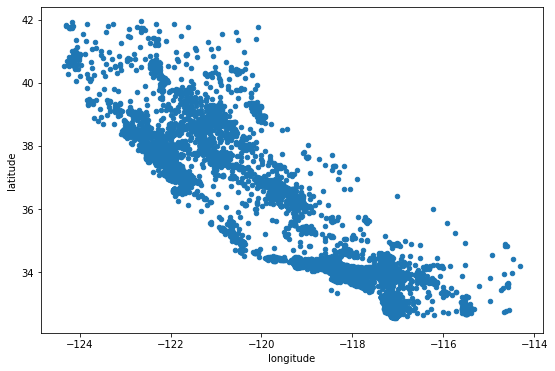

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,6))
plt.show()

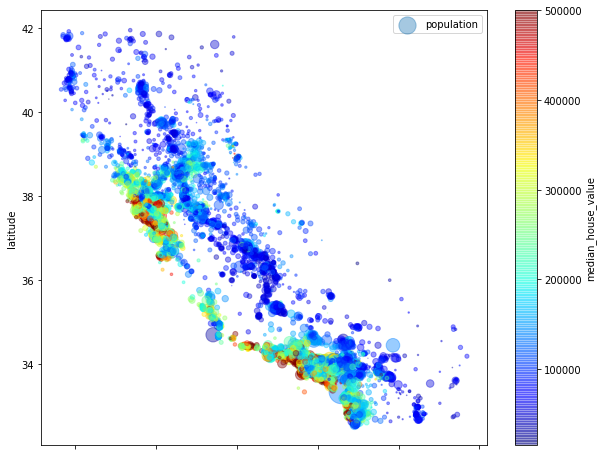

In [ ]:
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.4,
    s=housing['population']/60, # nuqta radiusi aholi soniga qarab o'zgaradi
    label="population",
    c="median_house_value", # nuqta rangi uyning narxiga qarab o'zgaradi
    cmap="jet", # ranglar. Ko'k - daromadi kam, qizil - daromadi ko'p
    colorbar=True,
    figsize=(10,8)
)
plt.show()

In [ ]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
dtype: float64

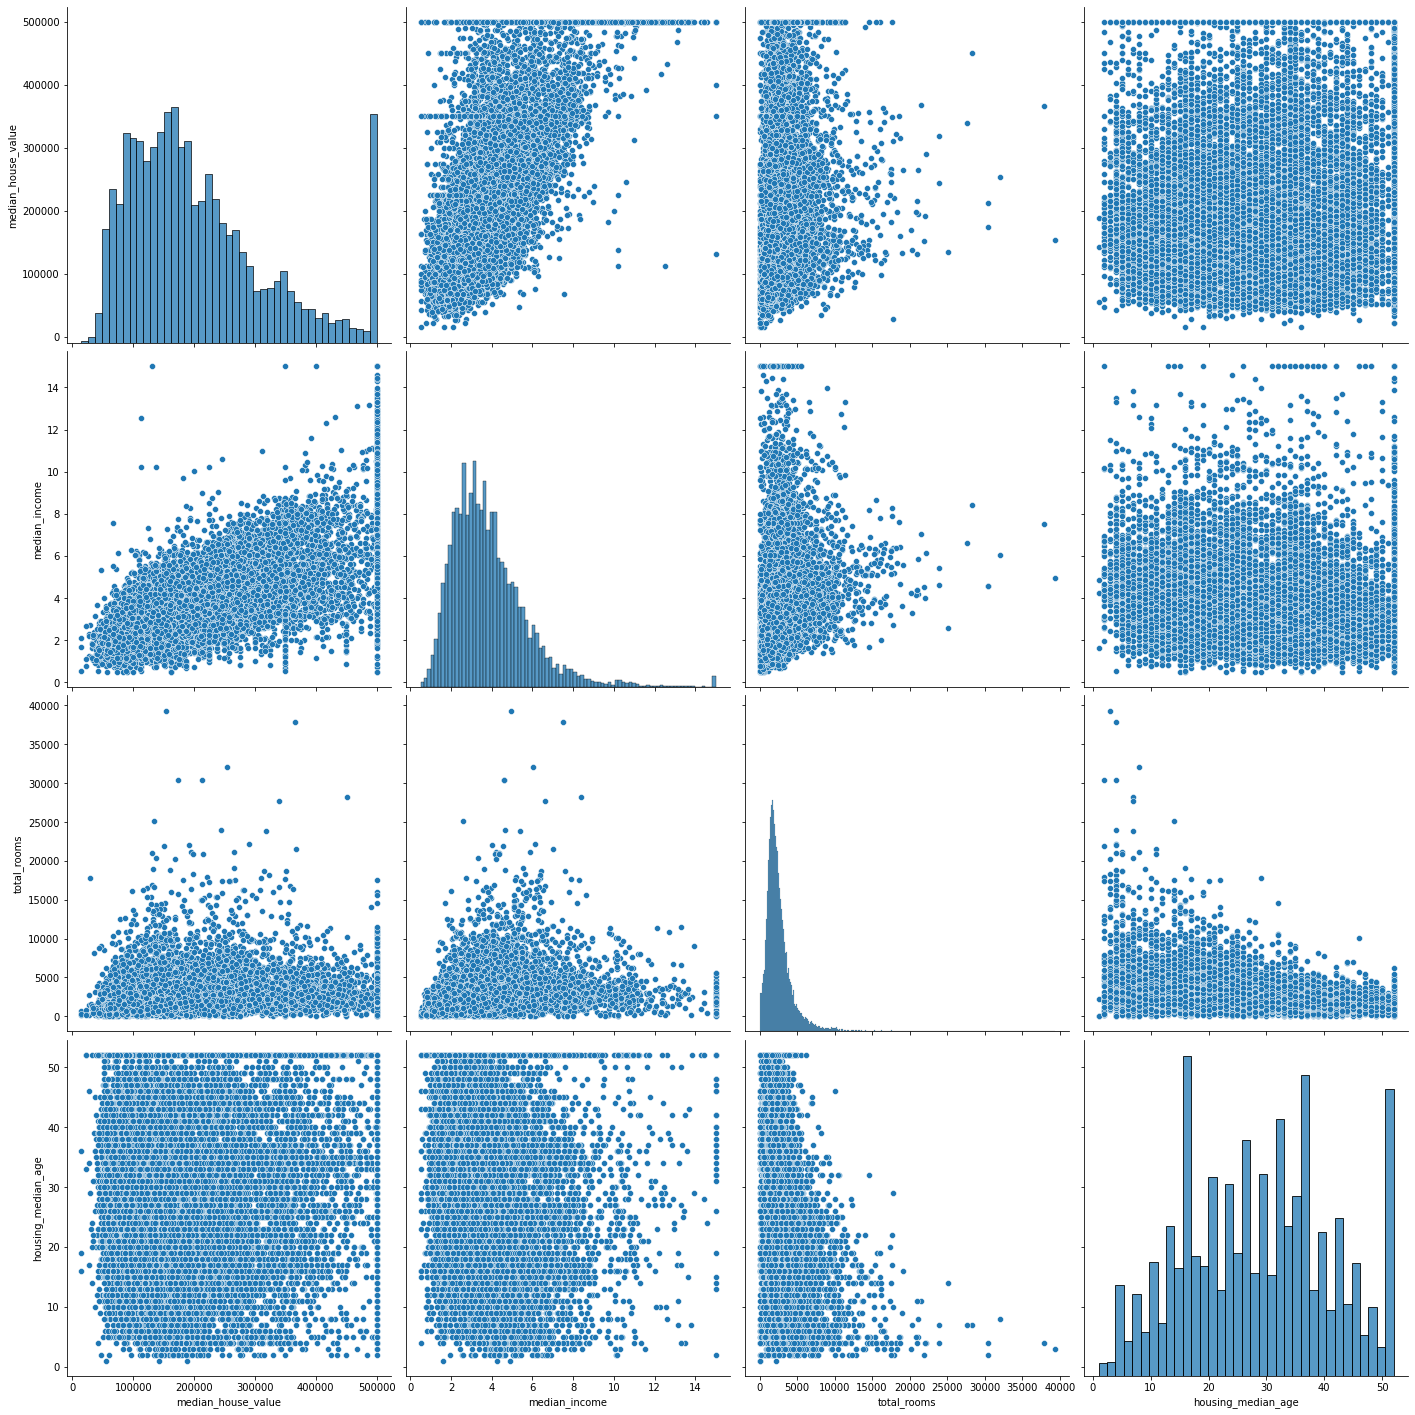

In [ ]:
cols = ['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[cols], height=5)
plt.show()

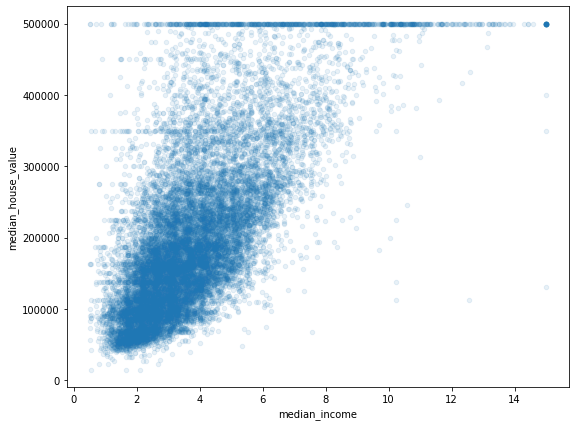

In [ ]:
housing.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1, figsize=(9,7))
plt.show()

In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
dtype: float64

In [3]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi

In [ ]:
from sklearn.model_selection import train_test_split
trein_set , test_set = train_test_split(df, train_size=0.2, random_state=45)

In [ ]:
husing = trein_set.drop('median_house_value', axis=1)
husing_labl = trein_set['median_house_value'].copy()

In [ ]:
husing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6738,-118.08,34.12,41.0,1598.0,280.0,807.0,282.0,5.5067,<1H OCEAN
10973,-117.85,33.76,26.0,2312.0,525.0,1273.0,437.0,2.8828,<1H OCEAN
3468,-118.48,34.31,31.0,1091.0,256.0,892.0,238.0,3.0000,<1H OCEAN
8454,-118.35,33.90,25.0,3309.0,902.0,2299.0,837.0,3.0417,<1H OCEAN
12060,-117.57,33.87,37.0,621.0,156.0,443.0,135.0,2.3333,INLAND
...,...,...,...,...,...,...,...,...,...
16547,-121.22,37.81,20.0,1811.0,352.0,1191.0,327.0,4.0125,INLAND
16317,-121.32,38.00,22.0,2105.0,521.0,781.0,483.0,2.2130,INLAND
12895,-121.33,38.65,24.0,3533.0,741.0,1496.0,723.0,2.8106,INLAND
6012,-117.78,34.07,18.0,3610.0,772.0,2899.0,765.0,3.9784,INLAND


In [ ]:
husing_labl

6738     325000.0
10973    204700.0
3468     172400.0
8454     237000.0
12060    122800.0
           ...   
16547    121500.0
16317     87500.0
12895    183200.0
6012     113500.0
6558     359400.0
Name: median_house_value, Length: 4128, dtype: float64

In [ ]:
husing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6738,-118.08,34.12,41.0,1598.0,280.0,807.0,282.0,5.5067,<1H OCEAN
10973,-117.85,33.76,26.0,2312.0,525.0,1273.0,437.0,2.8828,<1H OCEAN
3468,-118.48,34.31,31.0,1091.0,256.0,892.0,238.0,3.0000,<1H OCEAN
8454,-118.35,33.90,25.0,3309.0,902.0,2299.0,837.0,3.0417,<1H OCEAN
12060,-117.57,33.87,37.0,621.0,156.0,443.0,135.0,2.3333,INLAND
...,...,...,...,...,...,...,...,...,...
16547,-121.22,37.81,20.0,1811.0,352.0,1191.0,327.0,4.0125,INLAND
16317,-121.32,38.00,22.0,2105.0,521.0,781.0,483.0,2.2130,INLAND
12895,-121.33,38.65,24.0,3533.0,741.0,1496.0,723.0,2.8106,INLAND
6012,-117.78,34.07,18.0,3610.0,772.0,2899.0,765.0,3.9784,INLAND


In [ ]:
# 1-variant. Qatorlarni tashlab yuborish
housing.dropna(subset=['total_bedrooms']) # inplace=True qilishni unutmang

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [ ]:
# 2-variant. Ustunni tashlab yuborish
housing.drop("total_bedrooms", axis=1) # inplace=True qilishni unutmang

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [ ]:
# 3-variant. Median qiymat bilan to'ldirish
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # inplace=True qilishni unutmang

In [ ]:
# SimpleImputer klassini chaqiramiz
from sklearn.impute import SimpleImputer
# SimpleImputer klassidan yangi obyekt yaratamiz va NaN qiymatlarni median qiymat bilan to'ldirishni ko'rsatamiz
imputer = SimpleImputer(strategy="median")

In [ ]:
imputer.fit(housing)

ValueError: ignored

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [ ]:
housing_cat = housing[['ocean_proximity']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

#3-model MLga tayyorlash 

##MLga tayyorlash NaN qiymatlar





<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import sklearn

In [ ]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)

In [ ]:
housing = train_set.drop('median_house_value',axis=1)
husing_labl = train_set['median_house_value'].copy()

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,<1H OCEAN
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,NEAR BAY
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,NEAR OCEAN
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,<1H OCEAN


In [ ]:
#1-yo'l NAN qiymatlar bor  qatorlarni tashlab yuborish 
housing.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,<1H OCEAN
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,NEAR BAY
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,NEAR OCEAN
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,<1H OCEAN


In [ ]:
#2-yo'l  ustunni tashlab yuborish
housing.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,2074.0,644.0,2.6941,INLAND
11826,-121.04,39.00,21.0,4059.0,1874.0,693.0,4.8051,INLAND
4553,-118.24,34.06,33.0,390.0,435.0,193.0,1.1979,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,985.0,516.0,3.1305,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,511.0,278.0,4.3333,<1H OCEAN
...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1829.0,1393.0,1.7675,<1H OCEAN
16065,-122.48,37.75,49.0,2203.0,1052.0,405.0,4.4375,NEAR BAY
14501,-117.23,32.86,16.0,1200.0,648.0,443.0,3.0450,NEAR OCEAN
14555,-117.13,32.96,15.0,2267.0,1180.0,289.0,6.7120,<1H OCEAN


In [ ]:
# 3-variand nan qiymatlarni boshqa qiymatlar bilan almashtirish 

In [ ]:
median =housing['total_bedrooms'].median() # bu o'rta qiymatni hisoblaydi 

In [ ]:
median

436.0

In [ ]:
housing['total_bedrooms'].fillna(median)

9226      699.0
11826     730.0
4553      199.0
10787     580.0
4104      278.0
          ...  
11532    1508.0
16065     407.0
14501     468.0
14555     292.0
11590     377.0
Name: total_bedrooms, Length: 16512, dtype: float64

##ML tayyorgarlik NAN qiymatlar
###Simpleimputer

In [ ]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(strategy='median') # bu bizga bo'sh o'rinlarni  median qiymatlar bilan to'ldiradi 

In [ ]:
imputer.fit('housing') # bu xatoni sababi bizda qiymatlar str qiymatlar bor deydi 

ValueError: ignored

In [ ]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [ ]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333
...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120


In [ ]:
imputer.fit(housing_num) # bu bizga har bir qator uchun o'rtacha qiymat hisoblaydi 

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_  # bu bizga har bir qator uchun o'rtacha qiymatlar 

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  436.    , 1168.    ,
        410.    ,    3.5313])

In [ ]:
x= imputer.transform(housing_num)
x

array([[-1.2004e+02,  3.6930e+01,  1.1000e+01, ...,  2.0740e+03,
         6.4400e+02,  2.6941e+00],
       [-1.2104e+02,  3.9000e+01,  2.1000e+01, ...,  1.8740e+03,
         6.9300e+02,  4.8051e+00],
       [-1.1824e+02,  3.4060e+01,  3.3000e+01, ...,  4.3500e+02,
         1.9300e+02,  1.1979e+00],
       ...,
       [-1.1723e+02,  3.2860e+01,  1.6000e+01, ...,  6.4800e+02,
         4.4300e+02,  3.0450e+00],
       [-1.1713e+02,  3.2960e+01,  1.5000e+01, ...,  1.1800e+03,
         2.8900e+02,  6.7120e+00],
       [-1.1801e+02,  3.3780e+01,  2.6000e+01, ...,  1.1660e+03,
         3.7300e+02,  6.0000e+00]])

In [ ]:
x = imputer.fit_transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index =housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333
...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120


In [ ]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

##Matnlarni Ordenalencoder() metodi

In [ ]:
# matnli ustunlar kategoriyali ustunlar deb ataladi 

In [ ]:
housing_cat = housing[['ocean_proximity']]

In [ ]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7319
INLAND             5241
NEAR OCEAN         2140
NEAR BAY           1808
ISLAND                4
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordenal_encoder = OrdinalEncoder()

In [ ]:
ordenal_housing =  ordenal_encoder.fit_transform(housing_cat)
# bu yo'lning o'ziga yarasha kamchiligi bor 

In [ ]:
ordenal_housing[:10]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [1.],
       [3.],
       [4.],
       [0.]])

## matnlar bilan ishlash OneHotencoder() 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
housing_onehot = pd.get_dummies(housing['ocean_proximity']) # bu pandasdagi matnlar bilan ishlash 
housing_onehot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9226,0,1,0,0,0
11826,0,1,0,0,0
4553,1,0,0,0,0
10787,1,0,0,0,0
4104,1,0,0,0,0
...,...,...,...,...,...
11532,1,0,0,0,0
16065,0,0,0,1,0
14501,0,0,0,0,1
14555,1,0,0,0,0


##MLga tayyorgarlik transforn yasaymiz 

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix, bedroms_ix, population_ix, households_ix = 3,4,5,6
class CombinaDattrAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_badrooms_per_room=True):
    self.add_badrooms_per_room=add_badrooms_per_room
  def fit(self,x,y=None):
    return self # bizni funksiyamiz faqat transformer estimar emas
  def transform(self,x):
    rooms_par_household = x[:, rooms_ix] /x[:, households_ix]
    population_per_household = x[:, population_ix] / x[:, households_ix]
    if self.add_badrooms_per_room: # add_badrooms ustunida ixtiyoriy bo'ladi 
      bedrooms_per_room = x[:,bedroms_ix]/x[:, rooms_ix]
      return np.c_[x, rooms_par_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[x, rooms_par_household, population_per_household]


In [ ]:
housing_attr = CombinaDattrAdder()
housing_extra_attr  = housing_attr.transform(housing.values)

NameError: ignored

In [ ]:
housing_extra_attr[0,:]

array([-120.04, 36.93, 11.0, 3606.0, 699.0, 2074.0, 644.0, 2.6941,
       'INLAND', 5.599378881987578, 3.220496894409938,
       0.19384359400998336], dtype=object)

In [ ]:
# agar biz 3 ta emas 2 ustun joylashtirmoqchi bo'lsak 

housing_attr = CombinaDattrAdder( add_badrooms_per_room=False)
housing_extra_attr  = housing_attr.transform(housing.values)

In [ ]:
housing_extra_attr[0,:]

array([-120.04, 36.93, 11.0, 3606.0, 699.0, 2074.0, 644.0, 2.6941,
       'INLAND', 5.599378881987578, 3.220496894409938], dtype=object)

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,<1H OCEAN
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,NEAR BAY
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,NEAR OCEAN
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,<1H OCEAN


##min max scaler 

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,<1H OCEAN
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,NEAR BAY
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,NEAR OCEAN
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,<1H OCEAN


biz bu qiymatlarni 0 1 oraliqda chiqarishimiz kerak 

Y = (x-min)/(max-min)
#### 3.4.1 Min-max scaling

Min-max scaling berilgan qiymatlarni 0-1 oralig'iga olib keladi. 

Buning uchun biror ustundagi barcha qiymatlarning min ($x_{min}$) va max ($x_{max}$) qiymatlari topiladi. Keyin esa ustundagi har bir qiymat ($x$) quyidagi formula asosida hisoblab chiqiladi:

![](https://arshpreetsingh.files.wordpress.com/2017/03/normal.png)

In [ ]:
xmax = housing['median_income'].max()
xmax

15.0001

In [ ]:
xmin = housing['median_income'].min()
xmin

0.4999

In [ ]:
y = (2.6941-xmin)/(xmax-xmin)

In [ ]:
y

0.15132205073033478

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_min_max = min_max_scaler.fit_transform(housing_num)

In [ ]:
housing_min_max

array([[0.42928287, 0.46652497, 0.19607843, ..., 0.05791333, 0.10573919,
        0.15132205],
       [0.32968127, 0.68650372, 0.39215686, ..., 0.052307  , 0.11379707,
        0.29690625],
       [0.60856574, 0.16153029, 0.62745098, ..., 0.0119695 , 0.03157375,
        0.04813727],
       ...,
       [0.70916335, 0.03400638, 0.29411765, ..., 0.01794024, 0.07268541,
        0.17552172],
       [0.71912351, 0.04463337, 0.2745098 , ..., 0.03285306, 0.04736063,
        0.42841478],
       [0.6314741 , 0.13177471, 0.49019608, ..., 0.03246062, 0.06117415,
        0.37931201]])

In [ ]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333
...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120


## 3.4.2 Standard Scaler - standartlash
StandardScaler biroz boshqa usulda ishlaydi. Sonlarni standartlas hcuhn bizga berilgan ustun bo'yicha o'rta qiymat ($\mu$) va standart cheklanish ($\sigma$) talab qilinadi. Har bir qatordag qiymat esa quydagicha hisoblanadi

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxeMnm1BSa8qyNkCB6wqiYa790XtNxCdM48k_be-9zESUvivv_nuY6SXk8fpJK_psGiA&usqp=CAU)

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_sclear = StandardScaler()
standard_sclear.fit_transform(housing_num)

array([[-0.2372274 ,  0.60884466, -1.40527677, ...,  0.56469544,
         0.37692691, -0.61812701],
       [-0.73608108,  1.57723402, -0.60675482, ...,  0.38960948,
         0.5052438 ,  0.49551494],
       [ 0.66070922, -0.73380147,  0.35147153, ..., -0.87013403,
        -0.80411225, -1.40743592],
       ...,
       [ 1.16455143, -1.29518661, -1.00601579, ..., -0.68366748,
        -0.14943422, -0.4330124 ],
       [ 1.2144368 , -1.24840451, -1.08586799, ..., -0.21793882,
        -0.55271589,  1.5014855 ],
       [ 0.77544557, -0.86479133, -0.20749384, ..., -0.23019483,
        -0.33274407,  1.12587532]])

##ML tayorgarlik Pipeline

In [ ]:
# https://colab.research.google.com/drive/1hMeZjxvub1wWy364rDZjzEYUBHYgXGit#scrollTo=EY3FEybHC43r

#Mashina Learnig 

In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi

# Onlayn dataset joylashgan manzilini ko'rsatamiaz
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
# bizga kerak ustunlar indekslari
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room: # add_bedrooms_per_room ustuni ixtiyoriy bo'ladi
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room = True)),
          ('std_scaler', StandardScaler())             
])

In [ ]:
num_pipeline.fit_transform(housing_num)

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.17491646,
         0.05137609, -0.2117846 ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.40283542,
        -0.11736222,  0.34218528],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.08821601,
        -0.03227969, -0.66165785],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.60675918,
         0.02030568,  0.99951387],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.40217517,
         0.00707608, -0.79086209],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.85144571,
        -0.08535429,  1.69520292]])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared[0:5,:]

array([[ 1.27258656, -1.3728112 ,  0.34849025,  0.22256942,  0.21122752,
         0.76827628,  0.32290591, -0.326196  , -0.17491646,  0.05137609,
        -0.2117846 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.70916212, -0.87669601,  1.61811813,  0.34029326,  0.59309419,
        -0.09890135,  0.6720272 , -0.03584338, -0.40283542, -0.11736222,
         0.34218528,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.44760309, -0.46014647, -1.95271028, -0.34259695, -0.49522582,
        -0.44981806, -0.43046109,  0.14470145,  0.08821601, -0.03227969,
        -0.66165785,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.23269811, -1.38217186,  0.58654547, -0.56148971, -0.40930582,
        -0.00743434, -0.38058662, -1.01786438, -0.60001532,  0.07750687,
         0.78303162,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.10855122,  0.5320839 ,  1

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()


In [ ]:
LR_model.fit(housing_prepared, housing_labels )

LinearRegression()

In [ ]:
test_data = housing .sample(10)

In [ ]:
test_label =housing_labels.loc[test_data.index]

In [ ]:
test_label

6198     191800.0
18565    151700.0
16159    318500.0
7569     107900.0
11490    500001.0
13420    143400.0
11696    160500.0
8148     402500.0
6375     500001.0
13799     83300.0
Name: median_house_value, dtype: float64

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6198,-117.90,34.09,39.0,1726.0,333.0,892.0,335.0,4.3409,<1H OCEAN
18565,-121.74,36.92,17.0,2648.0,589.0,1193.0,540.0,2.4461,<1H OCEAN
16159,-122.49,37.78,52.0,2050.0,439.0,1109.0,437.0,2.6719,NEAR BAY
7569,-118.20,33.89,40.0,2538.0,564.0,2170.0,541.0,2.7212,<1H OCEAN
11490,-118.01,33.69,3.0,945.0,115.0,337.0,123.0,11.5199,<1H OCEAN
13420,-117.50,34.04,4.0,3428.0,649.0,2158.0,632.0,5.0175,INLAND
11696,-117.99,33.89,21.0,5195.0,1020.0,2539.0,988.0,4.5033,<1H OCEAN
8148,-118.08,33.81,20.0,6295.0,937.0,2292.0,874.0,7.6084,<1H OCEAN
6375,-118.03,34.16,36.0,1640.0,239.0,693.0,253.0,6.6888,INLAND
13799,-117.54,34.55,5.0,2949.0,671.0,1620.0,530.0,2.9479,INLAND


In [ ]:
predection = full_pipeline.transform(test_data)

In [ ]:
bashorat =LR_model.predict(predection)

In [ ]:

bashorat

array([235689.87723977, 188096.38349861, 215439.80558842, 165321.22047216,
       489373.14644896, 167931.60052379, 251352.41401451, 375996.1634141 ,
       285094.06185056,  92530.7337333 ])

In [ ]:

test_label

6198     191800.0
18565    151700.0
16159    318500.0
7569     107900.0
11490    500001.0
13420    143400.0
11696    160500.0
8148     402500.0
6375     500001.0
13799     83300.0
Name: median_house_value, dtype: float64

In [ ]:
df  = pd.DataFrame({'bashorat':bashorat,'real_baxosi':test_label})

In [ ]:
df

,bashorat,real_baxosi
6198,235689.877240,191800.0
18565,188096.383499,151700.0
16159,215439.805588,318500.0
7569,165321.220472,107900.0
11490,489373.146449,500001.0
13420,167931.600524,143400.0
11696,251352.414015,160500.0
8148,375996.163414,402500.0
6375,285094.061851,500001.0
13799,92530.733733,83300.0


In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6198,-117.90,34.09,39.0,1726.0,333.0,892.0,335.0,4.3409,<1H OCEAN
18565,-121.74,36.92,17.0,2648.0,589.0,1193.0,540.0,2.4461,<1H OCEAN
16159,-122.49,37.78,52.0,2050.0,439.0,1109.0,437.0,2.6719,NEAR BAY
7569,-118.20,33.89,40.0,2538.0,564.0,2170.0,541.0,2.7212,<1H OCEAN
11490,-118.01,33.69,3.0,945.0,115.0,337.0,123.0,11.5199,<1H OCEAN
13420,-117.50,34.04,4.0,3428.0,649.0,2158.0,632.0,5.0175,INLAND
11696,-117.99,33.89,21.0,5195.0,1020.0,2539.0,988.0,4.5033,<1H OCEAN
8148,-118.08,33.81,20.0,6295.0,937.0,2292.0,874.0,7.6084,<1H OCEAN
6375,-118.03,34.16,36.0,1640.0,239.0,693.0,253.0,6.6888,INLAND
13799,-117.54,34.55,5.0,2949.0,671.0,1620.0,530.0,2.9479,INLAND


In [ ]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


#Modelni baholash 

In [ ]:
x_test = test_set.drop('median_house_value', axis=1)

In [ ]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND


In [ ]:
y_test = test_set['median_house_value'].copy()

In [ ]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

In [ ]:
x_prediction = full_pipeline.transform(x_test)

In [ ]:
y_prediction = LR_model.predict(x_prediction)

In [ ]:
y_prediction

array([ 61874.25460143, 121853.52511139, 267770.94368091, ...,
       447837.04647878, 117275.9214608 , 185597.46125194])

In [ ]:

df1 = pd.DataFrame({'asl_narx':y_test, "bashorat_narx":y_prediction})

In [ ]:
df1

,asl_narx,bashorat_narx
20046,47700.0,61874.254601
3024,45800.0,121853.525111
15663,500001.0,267770.943681
20484,218600.0,264468.298380
9814,278000.0,258485.695855
...,...,...
15362,263300.0,214774.565911
16623,266800.0,236868.742582
18086,500001.0,447837.046479
2144,72300.0,117275.921461


In [ ]:
from sklearn.metrics import mean_absolute_error

mea = mean_absolute_error(y_test,y_prediction)

In [ ]:

mea

50898.7395349408

In [ ]:
from sklearn.metrics import mean_squared_error

mean = mean_squared_error(y_test,y_prediction)

NameError: ignored

In [ ]:
print(np.sqrt(mean))

72701.32600762138


#Modelni baholash random fores

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()

RF_model.fit(housing_prepared, housing_labels )

RandomForestRegressor()

In [ ]:
y_prediction = RF_model.predict(x_prediction)

In [ ]:
from sklearn.metrics import mean_squared_error

mean = mean_squared_error(y_test,y_prediction)
print(np.sqrt(mean))

50225.23847423947


In [ ]:
from sklearn.metrics import mean_absolute_error

mea = mean_absolute_error(y_test,y_prediction)
mea

32370.556935562017

#Modelni baholash cros validasion
## Cross-Validation usuli bilan baholash

Yuqorida biz modelni baholash uchun ma'lumotlarni test va train setlarga ajratdik. 
Bu usulning kamchiligi biz test va train uchun doim bir xil ma'lumotlardan foydalanayapmiz. 

Cross-validation yordamida biz ma'lumotlarni bir necha qismga ajratib, modelni turli qismlar yordamida bir nechta bor train va test qilishimiz mumkin. 

Misol uchun, quyidagi rasmda ma'lumotlarni 5 ga ajratib train va test qilish ko'rsatilgan.

![](https://www.oreilly.com/library/view/machine-learning-quick/9781788830577/assets/b90b29ab-dfe7-4c11-9a2f-321e84f79495.png)

In [ ]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value'].copy()

x_prepered = full_pipeline.transform(x)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(LR_model, x_prepered, y,  scoring="neg_mean_squared_error", cv=10)


array([-7.08770558e+09, -3.74510262e+09, -7.52595175e+09, -3.87993733e+09,
       -6.48675610e+09, -4.74988363e+09, -2.75665210e+09, -8.26464244e+09,
       -6.03335515e+09, -2.90969679e+09])